## 초보자 딥러닝 입문하기
 * keras를 이용한 딥러닝을 이용한 손글씨 인식

### 내 컴퓨터에 실행해 볼 경우, 사전 설치 필요

* command prompt(도스창에서 실행할 때)
  * only CPU
  * pip install tensorflow==1.15.0
  * pip install keras
  
* 만약 설치가 되어 있지 않을경우, 
 * from keras.datasets import mnist 에 에러 발생.
 * No module named 'keras'

* 주피터 노트북에서 설치할 경우, '!'을 붙여서 설치 진행

```
!pip install tensorflow==1.15.0
!pip install keras

!은 주피터 또는 구글 콜랩에서 도스창 또는 리눅스 환경의 명령을 실행할 때 사용하는 명령문이다.
```

### 라이브러리 불러오기
* 대표적인 딥러닝 구현 Tool
  * Tensorflow, Keras, Pytorch

In [34]:
import tensorflow as tf
import keras

In [35]:
### 라이브러리 확인
import numpy        # 선형대수 관련(배열 생성 관련)
import matplotlib   # 시각화

### 케라스(Keras) 의미 이해
 * ONEIROS(Open-ended Neuro-Electronic Intelligent Robot Operating System) 프로젝트 일부
 * 오네이로스의 의미는 꿈을 의인화 시킨 신이다.   

### 케라스의(Keras) 주요 특징 4가지
* 개발 및 유지 보수 : 프랑소와 쏠레(Francois Chollet) - 구글에 있음.(tf 2.0)
* 모듈화(Modularity) : 모듈은 독립적이고 최소한의 제약사항으로 연결
* 최소주의(Minimalism) : 각 모듈은 짧고 간결하다.
* 쉬운 확장성 : 새로운 클래스나 함수로 모듈을 아주 쉽게 추가 
* 파이썬 기반 : 파이썬 코드로 모델들이 정의

## 케라스(Keras) 딥러닝 모델 만들기 절차 이해
 * 가. 데이터 셋 생성 및 데이터 형태 맞추기
    - 데이터 준비(훈련셋, 검증셋, 시험셋 등)
    - 딥러닝 모델의 학습 및 평가를 위한 데이터 형태 맞추기(포맷 변환)
    
 * 나. 모델 만들기
    - 모델(Sequential)을 생성 후, 레이어를 추가하여 구성
    - 복잡한 모델을 구성시에 Keras API를 사용 
        
 * 다. 모델 학습과정 설정하기( 학습에 대한 설정 - compile() )
    - 학습에 대한 설정, 손실 함수 및 최적화 방법 정의
    
 * 라. 모델 학습( 모델을 훈련셋(train)으로 학습 - fit() 함수 ) 
 * 마. 학습과정 살펴보기( 훈련셋, 검증셋의 손실 및 정확도 측정 )
 * 바. 모델 평가( evaluate() ) - 준비된 시험셋으로 학습 모델 평가
 * 사. 모델 사용하기(predict() )

### 코드 이해
* 십진수 숫자를 0,1로 이루어진 것으로 변환
  * from keras.utils import np_utils  

* 데이터 셋(손글씨)
 * from keras.datasets import mnist  

* 모델 만들기
 * from keras.models import Sequential 

* 딥러닝 층 구성
 * (Dense-층세부내용 Activation:활성화함수)
 * from keras.layers import Dense, Activation

In [36]:
# 사용할 패키지 불러오기
from keras.utils import np_utils     
from keras.datasets import mnist    
from keras.models import Sequential  
from keras.layers import Dense, Activation 

In [48]:
# 데이터셋 생성하기
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [49]:
### 나중에 사용하기 위해 복사해둠.
x_train_n = x_train.copy()
y_train_n = y_train.copy()
x_test_n = x_test.copy()
y_test_n = y_test.copy()

In [50]:
import matplotlib.pyplot as plt

### 손글씨 데이터 시각화
* y_train : 손글씨 그림의 숫자(0~9) 정보  
* x_train : 손글씨 그림의 픽셀정보(28x28) 총 784개의 픽셀정보

label=[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1]


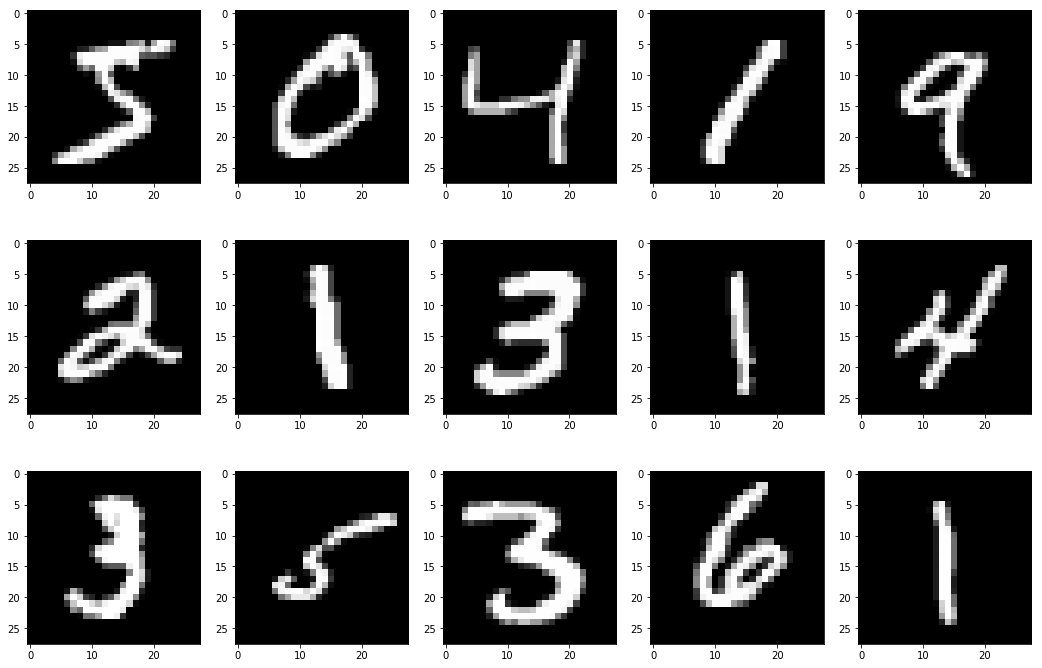

In [51]:
figure,axes = plt.subplots(nrows=3, ncols=5)  # 3행 5열의 구조 
figure.set_size_inches(18,12)  # 전체 크기

plt.gray()
print("label={}".format(y_train[0:15]))   # x데이터 0~14개 가져오기

col = 0
for row in range(0,3):
    col = row * 5
    axes[row][0].imshow(x_train[col])  # 0,5,10의 값을 갖는 위치 값 이미지 표시
    axes[row][1].imshow(x_train[col+1])# 1,6,11의 값을 갖는 위치 값 이미지 표시
    axes[row][2].imshow(x_train[col+2])# 2,7,12의 값을 갖는 위치 값 이미지 표시
    axes[row][3].imshow(x_train[col+3])# 3,8,13의 값을 갖는 위치 값 이미지 표시
    axes[row][4].imshow(x_train[col+4])# 4,9,114의 값을 갖는 위치 값 이미지 표시

### 데이터 처리
* RGB 컬러값이 0~255를 0~1사이로 만듬  /255.0
* 딥러닝 구조를 맞추기 위해 x_train, x_test, y_train, y_test의 값 변경
* x_train, x_test (60000, 28, 28) -> (60000, 784)
* y_train, y_test 숫자(0~9)를 2진 벡터형태로 변경( 0 0 0 0 1 0 0 0 0 0)

In [52]:
x_train = x_train.reshape(60000, 784).astype('float32') / 255.0
x_test = x_test.reshape(10000, 784).astype('float32') / 255.0
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

### 모델 만들기
* 첫번째 add => 
  * Dense() : 층의 세부 내용 지정
  * input_dim : 입력층의 뉴런 개수, units : 입력층 이후의 은닉층의 뉴런 개수
  * activation : 활성화 함수 지정
* 두번째 add =>
  * units = 10 : 손글씨의 예측 값이 0~9사이의 값이므로 10개
  * 일반적으로 마지막 층(출력층)이 범주형 여러개 예측일 경우 softmax 함수를 사용 

In [53]:
# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=64, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

### 모델의 세부 설정
* 비용함수(loss) : categorical_crossentropy(범주형(다항분류)의 경우)
* 최적화함수(optimizer) : sgd(Stochastic Gradient Descent) 알고리즘 이용
* 최종 평가(metrics) :  정확도로 측정(손글씨를 정답을 맞춰는지 아닌지)

In [54]:
# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', 
              optimizer='sgd', metrics=['accuracy'])

### 모델 학습시키기

In [55]:
# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=10, batch_size=10)

Epoch 1/10
60000/60000 [==============================] - 13s 214us/step - loss: 0.4303 - accuracy: 0.8811
Epoch 2/10
60000/60000 [==============================] - 20s 335us/step - loss: 0.2456 - accuracy: 0.9310
Epoch 3/10
60000/60000 [==============================] - 19s 323us/step - loss: 0.1994 - accuracy: 0.9437
Epoch 4/10
60000/60000 [==============================] - 19s 309us/step - loss: 0.1702 - accuracy: 0.9520
Epoch 5/10
60000/60000 [==============================] - 19s 318us/step - loss: 0.1488 - accuracy: 0.9575
Epoch 6/10
60000/60000 [==============================] - 17s 286us/step - loss: 0.1326 - accuracy: 0.9622
Epoch 7/10
60000/60000 [==============================] - 16s 267us/step - loss: 0.1202 - accuracy: 0.9660
Epoch 8/10
60000/60000 [==============================] - 14s 237us/step - loss: 0.1095 - accuracy: 0.9691
Epoch 9/10
60000/60000 [==============================] - 14s 235us/step - loss: 0.1010 - accuracy: 0.9711
Epoch 10/10
60000/60000 [============

### 학습을 통해 얻어진 값 살펴보기
* epoch 10번이므로 값이 각각 10개씩

In [61]:
# 5. 학습과정 살펴보기
print('## training loss and acc ##')
print(hist.history['loss'])        # 'val_loss' : 평가셋 손실값
print(hist.history['accuracy'])    # 'val_acc'  : 평가셋 정확도

## training loss and acc ##
[0.43030556669288006, 0.24555566107442914, 0.19939720936317462, 0.17019930676401904, 0.14883394553190252, 0.13257914175403615, 0.12020998909027548, 0.10953497396584135, 0.1009510952674124, 0.09303078037092928]
[0.8811167, 0.9309667, 0.94365, 0.95205, 0.9575167, 0.9622333, 0.96598333, 0.9691, 0.97113335, 0.9734333]


### 모델 평가하기
* 테스트 데이터 셋(x_test, y_test) 을 이용
* 첫번째 값이 : loss 손실값.
* 두번째 값이 : 정확도

In [62]:
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

10000/10000 [==============================] - 0s 46us/step
## evaluation loss and_metrics ##
[0.1004981144471094, 0.9692000150680542]


[7 2]


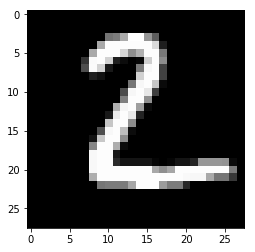

In [63]:
# 7. 모델 사용하기(2개 데이터 준비) - 변형되지 않은 데이터(y_test) 확인해본다
print(y_test_n[0:2])
plt.imshow(x_test_n[0])
plt.imshow(x_test_n[1])

In [64]:
xhat = x_test[0:1]     # 정규화 0~1 사이의 데이터 
xhat

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [67]:
yhat = model.predict(x_test[0])   # 예측 
print('## yhat ##')       
print(yhat)                  # 예측된 확률(0-9)
print(yhat.argmax(1))        # 가장 큰 확률을 갖는 값의 위치

ValueError: Error when checking input: expected dense_7_input to have shape (784,) but got array with shape (1,)

## 실습 과제
* 가. epoch=5 -> 10를 변경하면 해 보자. 어떤 현상이 발생되는가?
* 나. batch_size=32 -> 10를 변경한 이후에 해 보자.

## 참고 동영상 : https://www.youtube.com/watch?v=aircAruvnKk